In [ ]:
!pip3 install virtualenv
!virtualenv theanoEnv
!source /content/theanoEnv/bin/activate;
!sudo apt-get update -y

!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

##THIS COMMAND WILL ASK FOR CHOICE OF OPTION. SELECT 2 AND HIT ENTER.
!sudo update-alternatives --config python3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 16.2 MB/s eta 0:00:00
created virtual environment CPython3.10.11.final.0-64 in 1351ms
  creator CPython3Posix(dest=/content/theanoEnv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x

In [ ]:
!python --version

Python 3.7.16


In [ ]:
!sudo apt install python3-pip
!sudo apt install python3.7-distutils

!pip3 install tensorflow==1.15
!pip install keras==2.2.4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 2,389 kB of archives.
After this operation, 4,933 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python-pip-whl all 20.0.2-5ubuntu1.8 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3-setuptools all 45.2.0-1ubuntu0.1 [330 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-wheel all 0.34.2-1ubuntu0.1 [23.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-pip all 20.0.2-5ubuntu1.8 [231 kB]
Fetched 2,389 kB in 2s (95

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 15.3 MB/s 
     |████████████████████████████████| 596 kB 53.8 MB/s 
     |████████████████████████████████| 38.1 MB 189 kB/s 


In [ ]:
%load_ext autoreload
%autoreload 2

# Section 1: TCAV
Please refer this source https://github.com/pnxenopoulos/cav-keras/blob/master/docs/examples/cifar_example.ipynb on how you can run TCAV. The repository consists of an example based CIFAR 10 Dataset. You can use same code.

You are allowed to change the code template in accordance with the example provided. 

In [ ]:
!git clone https://github.com/pnxenopoulos/cav-keras.git
%cd cav-keras

Cloning into 'cav-keras'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 369 (delta 1), reused 0 (delta 0), pack-reused 363
Receiving objects: 100% (369/369), 23.58 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/cav-keras


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100, cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from cav.tcav import *

np.random.seed(1996)

(10000, 32, 32, 3)

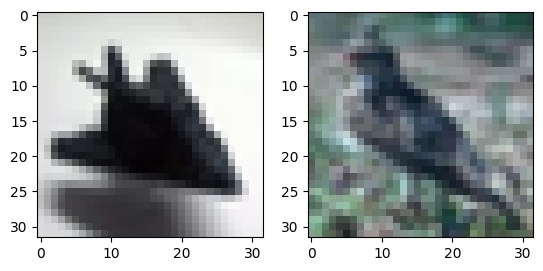

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Keep airplanes from CIFAR-10
interested_class = y_train == [0]
interested_class_indx = [i for i, x in enumerate(interested_class) if x]
x_train_class_one = x_train[interested_class_indx]
other = y_train == [2]
other_indx = [i for i, x in enumerate(other) if x]
x_train_class_two = x_train[other_indx]

x_train = np.append(x_train_class_one, x_train_class_two, axis = 0)
y_train = [1] * 5000
y_train = y_train + [0] * 5000

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(x_train[7777])

x_test.shape

In [ ]:
def extract_airplane_set():
    #TODO: Extract the indexes of all the images with 'airplane' as the output label from both train and test.
    #TODO: Return the preprocessed sets of both train and test sets
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Keep airplanes from CIFAR-10
    interested_class = y_train == [0]
    interested_class_indx = [i for i, x in enumerate(interested_class) if x]
    x_train_class_one = x_train[interested_class_indx]
    other = y_train == [2]
    other_indx = [i for i, x in enumerate(other) if x]
    x_train_class_two = x_train[other_indx]

    x_train = np.append(x_train_class_one, x_train_class_two, axis = 0)
    y_train = [1] * 5000
    y_train = y_train + [0] * 5000

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    return x_train, y_train, x_test, y_test

def extract_cloud_set():
    
    (x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()
    #TODO: Extract the indexes of all the images with 'cloud' as the output label for ONLY train set.
    #TODO: Return ONLY train set (No preprocess needed)

    # coarse_class_names = ['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']
    # fine_class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

    # x_train_concept_cloud = []
    # y_train_concept_cloud = []

    # for i in range(len(y_train)):
    #     if fine_class_names[y_train[i][0]] == 'cloud':
    #         y_train_concept_cloud.append(i)

    # for i in range(len(x_train)):
    #     if fine_class_names[y_train[i][0]] == 'cloud':
    #         x_train_concept_cloud.append(i)

    concept = y_train_concept == [25]
    indices = concept
    indx_to_use = [i for i, x in enumerate(indices) if x]

    x_train_concept = x_train_concept[indx_to_use]

    return x_train_concept, y_train_concept

def load_and_transfer_learn():
    # Load the ResNet50 model without the top layers
    resnet_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

    # Freeze the pre-trained layers
    for layer in resnet_model.layers:
        layer.trainable = False

    # Add custom top layers
    x = resnet_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    # Create the final model
    model = keras.models.Model(inputs=resnet_model.input, outputs=x)

    return model

def tcav_scores(model, x_train, y_train, x_train_concept):
    bottleneck = 1
    tcav_obj = TCAV()
    tcav_obj.set_model(model)
    
    # TODO: Train CAV using the prepared concept cloud
    # TODO: Calculate and print the sensitivity of TCAV with respect to x_train, y_train

    tcav_obj.split_model(bottleneck = bottleneck, conv_layer = True)
    tcav_obj.train_cav(x_train_concept)
    tf.compat.v1.disable_eager_execution()
    tcav_obj.calculate_sensitivity(x_train, y_train)
    tcav_obj.print_sensitivity()


In [ ]:
x_train, y_train, x_test, y_test = extract_airplane_set()
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train_concept, y_train_concept = extract_cloud_set()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate optimizer
opt = keras.optimizers.Adam(lr=0.001)

# train the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = np.array(x_train)
y_train = np.array(y_train)

##TODO: Define your choice of batch_size, number of epochs, loss function (e.g. categorical crossentropy), and optimizer (SGD\Adam)
batch_size = 8
epochs = 5
loss_func = 'binary_crossentropy'    #<--- has to be in string format
optim = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)       #<--- has to be in string format
model.compile(loss=loss_func, optimizer=optim, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 9s 875us/sample - loss: 0.4440 - accuracy: 0.7997
Epoch 2/5
10000/10000 [==============================] - 9s 943us/sample - loss: 0.3638 - accuracy: 0.8438
Epoch 3/5
10000/10000 [==============================] - 9s 931us/sample - loss: 0.3352 - accuracy: 0.8624
Epoch 4/5
10000/10000 [==============================] - 8s 830us/sample - loss: 0.3106 - accuracy: 0.8716
Epoch 5/5
10000/10000 [==============================] - 10s 983us/sample - loss: 0.2964 - accuracy: 0.8791


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                     

In [ ]:
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()

concept = y_train_concept == [25]
indices = concept
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train_concept = x_train_concept[indx_to_use]



In [ ]:
x_train_concept.shape

(500, 32, 32, 3)

In [ ]:
bottleneck = 11
tcav_obj = TCAV()
tcav_obj.set_model(model)

# TODO: Train CAV using the prepared concept cloud
# TODO: Calculate and print the sensitivity of TCAV with respect to x_train, y_train

tcav_obj.split_model(bottleneck = bottleneck, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tf.compat.v1.disable_eager_execution()
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


The sensitivity of class 1 is  0.0284
The sensitivity of class 0 is  0.9962
